In [13]:
#y=β0+β1x+ε
#predictor = x
#outcomes = y
#belta0 = the mean response when the predictor is zero
#belta1 = is the change mean response for a one-unit increase in the value of the predictor
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 200
belta0 = 1
belta1 = 2
sigma = 1

np.random.seed(0)
x = np.random.uniform(0, 10, n)
e = np.random.normal(0, sigma, n)
y = belta0 + belta1 * x + e

df = pd.DataFrame({'x' : x, 'y' : y})
df['Data'] = 'Data'
px.scatter(df, x='x',  y='y', color='Data', 
           trendline='ols', title='y vs. x')

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data'))

In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 200
belta0 = 1
belta1 = 2
sigma = 1

np.random.seed(0)
x = np.random.uniform(0, 10, n)
e = np.random.normal(0, sigma, n)
y = belta0 + belta1 * x + e

df = pd.DataFrame({'x' : x, 'y' : y})
data_model = smf.ols("y ~ x", data=df)
estimate_model = data_model.fit()

model_data_specification = smf.ols("y~x", data=df) 
fitted_model = model_data_specification.fit() 

fitted_model.summary()
fitted_model.summary().tables[1]
fitted_model.params
fitted_model.params.values
fitted_model.rsquared

df['Data'] = 'Data' 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x')

fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")
fig.show()

In [15]:
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = belta0 + belta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(belta0)+' + '+str(belta1)+' * x', 
                line=dict(dash='dot', color='orange'))

In [16]:
#You can find the intercept which is beta0 and the slope which is beta1. Then you can subsititute predictors to find
#fitted value

In [17]:
#In simple linear regression, the OLS method chooses the line that minimizes the total squared differences between observed and predicted values, ensuring both accurate and stable predictions.

In [18]:
#1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
#the formula is the error that can be explained divied by the entire error.
#fitted_model.rsquared
#it is the formula to calculate rsquare
#np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
#it trys to find the coefficient of Y and the Y^ which is estimate values and then square
#np.corrcoef(Y,x)[0,1]**2
#it trys to find the coefficient of Y and the x and then square

In [19]:
#Assumption1 Linearity 
#There's a linear relationship in the parameters.
#Assumption2 Independence 
#Error(residual) is independent
#Assumption 3 - Common Error variance 
#The errors have a common variance 𝜎^2
#Assumption 4 - Normality of Errors 
#the errors are normally distributed with a mean and variance
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show()

#the graph of residuals vs. frequency is not normal distributed

In [20]:
#H0: m = 0
#Ha: m != 0
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

#reject H0 means there's a linear relationship

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:57:13   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#H0: m = 0
#Ha: m != 0
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show()

#the p_value is 0.238 which fail to reject H0, which means there's no evidence

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


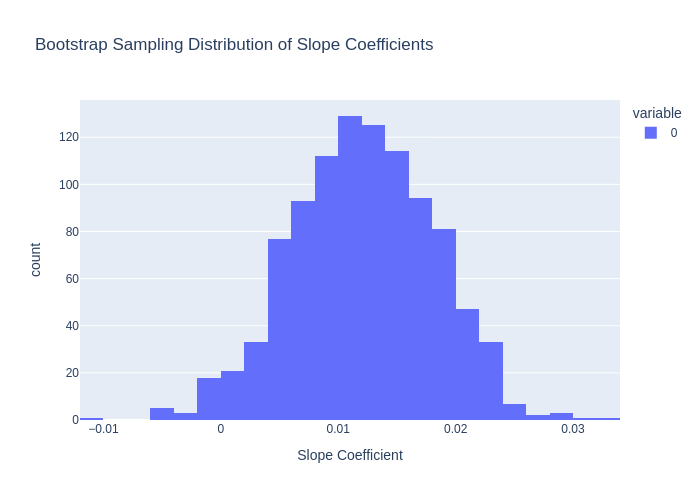

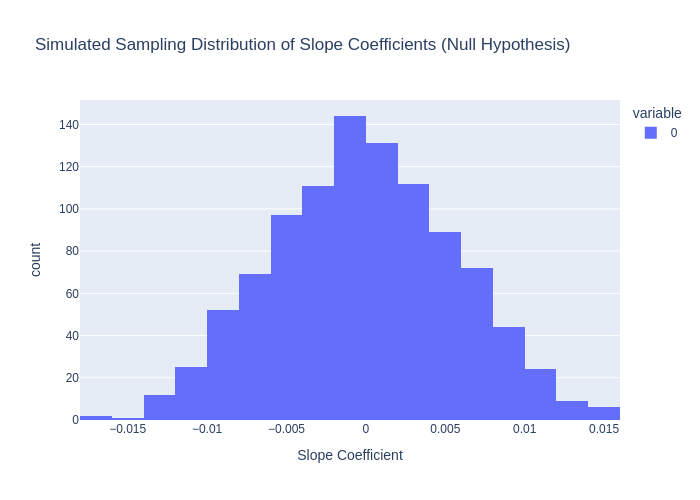

Observed Slope: 0.012244029446523483
95% Bootstrapped Confidence Interval for Slope: [-0.00012006094745982904, 0.022971097487883656]
Contains Observed Slope: True
Simulated p-value: 0.027
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


In [22]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
n_bootstrap_samples = 1000

bootstrapped_slope_coefficients = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params.iloc[1])  # Updated to use iloc for positional access

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

fig_bootstrap = px.histogram(
    bootstrapped_slope_coefficients, nbins=30,
    title="Bootstrap Sampling Distribution of Slope Coefficients",
    labels={'value': 'Slope Coefficient', 'count': 'Frequency'}
)
fig_bootstrap.show(renderer="png")

simulated_slope_coefficients = []

for _ in range(n_bootstrap_samples):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params.iloc[1])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

fig_simulation = px.histogram(
    simulated_slope_coefficients, nbins=30,
    title="Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)",
    labels={'value': 'Slope Coefficient', 'count': 'Frequency'}
)
fig_simulation.show(renderer="png")

observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]

ci_lower, ci_upper = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

contains_observed_slope = ci_lower <= observed_slope <= ci_upper

simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

print(f"Observed Slope: {observed_slope}")
print(f"95% Bootstrapped Confidence Interval for Slope: [{ci_lower}, {ci_upper}]")
print(f"Contains Observed Slope: {contains_observed_slope}")
print(f"Simulated p-value: {simulated_p_value}")

model_summary = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary()
print(model_summary.tables[1])


In [23]:
#The original models used waiting as a continuous predictor variable, estimating the relationship between the exact wait time and eruption duration.
#The new model uses kind as a categorical variable, dividing wait times into two groups (short and long) and examining the average difference in eruption duration between these groups.
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
#the p_value is 0, which means there's a linear relationship (no difference between groups on average)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#model 1 support this assumption, as it is the only one that is normal distributed